<a href="https://colab.research.google.com/github/Shashank2579/CIFAR10_Object_Recognition/blob/main/CIFAR_10_Object_Recognition_using_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
#Dataset as API
!kaggle competitions download -c cifar-10

 98% 699M/715M [00:04<00:00, 128MB/s]
100% 715M/715M [00:04<00:00, 150MB/s]


In [4]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [5]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
!ls

cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [7]:
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 32.2 MB/s eta 0:00:00


In [8]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()
archive.close()

In [9]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


Importing the Dependencies


In [10]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [11]:
filenames = os.listdir('/content/train')

In [12]:
type(filenames)

list

In [13]:
len(filenames)

50000

In [14]:
print(filenames[0:5])
print(filenames[-5:])

['16147.png', '20948.png', '23328.png', '7000.png', '17476.png']
['15107.png', '32898.png', '15896.png', '48182.png', '18990.png']


**Labels Processing**

In [15]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [16]:
labels_df.shape

(50000, 2)

In [18]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [19]:
labels_df[labels_df['id'] == 7796]

,id,label
7795,7796,frog


In [20]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [21]:
labels_df['label'].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

In [22]:
labels_df['label']

0              frog
1             truck
2             truck
3              deer
4        automobile
            ...    
49995          bird
49996          frog
49997         truck
49998    automobile
49999    automobile
Name: label, Length: 50000, dtype: object

In [23]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]

In [24]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


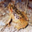

In [26]:
# displaying sample image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/7796.png')
cv2_imshow(img)

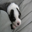

In [27]:
# displaying sample image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/45888.png')
cv2_imshow(img)

In [28]:
labels_df[labels_df['id'] == 45888]

,id,label
45887,45888,dog


In [29]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [30]:
id_list = list(labels_df['id'])

In [31]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


**Image Processing**

In [32]:
# convert images to numpy arrays

train_data_folder = '/content/train/'

data = []

for id in id_list:

  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [33]:
type(data)

list

In [34]:
data[0].shape

(32, 32, 3)

In [35]:
data[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [36]:
# convert image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [37]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


**Train Test Split**

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [39]:
print(X.shape, X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [40]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [41]:
X_train_scaled

array([[[[0.81960784, 0.82352941, 0.79607843],
         [0.83529412, 0.83921569, 0.81960784],
         [0.85490196, 0.85882353, 0.84313725],
         ...,
         [0.49803922, 0.29019608, 0.15294118],
         [0.47843137, 0.26666667, 0.1372549 ],
         [0.45490196, 0.24705882, 0.1254902 ]],

        [[0.82352941, 0.82352941, 0.79215686],
         [0.83529412, 0.83921569, 0.81176471],
         [0.85490196, 0.8627451 , 0.83921569],
         ...,
         [0.48627451, 0.2745098 , 0.1372549 ],
         [0.4745098 , 0.2627451 , 0.12941176],
         [0.48235294, 0.27058824, 0.14117647]],

        [[0.80784314, 0.80392157, 0.76470588],
         [0.81960784, 0.81960784, 0.79215686],
         [0.83529412, 0.84313725, 0.81960784],
         ...,
         [0.48627451, 0.2745098 , 0.14509804],
         [0.51372549, 0.30196078, 0.16470588],
         [0.51372549, 0.30588235, 0.16078431]],

        ...,

        [[0.49803922, 0.42352941, 0.38039216],
         [0.54117647, 0.47843137, 0.43137255]

In [42]:
X_train[0]

array([[[209, 210, 203],
        [213, 214, 209],
        [218, 219, 215],
        ...,
        [127,  74,  39],
        [122,  68,  35],
        [116,  63,  32]],

       [[210, 210, 202],
        [213, 214, 207],
        [218, 220, 214],
        ...,
        [124,  70,  35],
        [121,  67,  33],
        [123,  69,  36]],

       [[206, 205, 195],
        [209, 209, 202],
        [213, 215, 209],
        ...,
        [124,  70,  37],
        [131,  77,  42],
        [131,  78,  41]],

       ...,

       [[127, 108,  97],
        [138, 122, 110],
        [141, 127, 118],
        ...,
        [158, 149, 134],
        [161, 156, 151],
        [136, 137, 148]],

       [[145, 130, 119],
        [148, 135, 128],
        [136, 127, 128],
        ...,
        [175, 174, 172],
        [160, 161, 170],
        [143, 148, 164]],

       [[138, 128, 123],
        [140, 132, 136],
        [136, 131, 140],
        ...,
        [150, 154, 169],
        [145, 149, 166],
        [140, 145, 163]]

**Building the Neural Network**

In [44]:
import tensorflow as tf
from tensorflow import keras

In [45]:
num_of_classes = 10

# setting up the layers of Neural Network

model = keras.Sequential([

    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')
])

In [46]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [47]:
# training the neural network
model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 9s 4ms/step - loss: 1.9707 - acc: 0.2782 - val_loss: 1.8759 - val_acc: 0.3092
Epoch 2/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.8590 - acc: 0.3218 - val_loss: 1.8058 - val_acc: 0.3487
Epoch 3/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8317 - acc: 0.3322 - val_loss: 1.8261 - val_acc: 0.3402
Epoch 4/10
1125/1125 [==============================] - 5s 5ms/step - loss: 1.8207 - acc: 0.3350 - val_loss: 1.7916 - val_acc: 0.3375
Epoch 5/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8101 - acc: 0.3403 - val_loss: 1.7834 - val_acc: 0.3510
Epoch 6/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8025 - acc: 0.3433 - val_loss: 1.8628 - val_acc: 0.3090
Epoch 7/10
1125/1125 [==============================] - 5s 5ms/step - loss: 1.7942 - acc: 0.3458 - val_loss: 1.7749 - val_acc: 0.3530
Epoch 8/10
1125/1125 [==============================] - 4s 3ms

**ResNet50**

In [48]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [49]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                      

In [50]:
num_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [51]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [52]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 490s 405ms/step - loss: 2.0601 - acc: 0.2553 - val_loss: 2.0724 - val_acc: 0.2482
Epoch 2/10
1125/1125 [==============================] - 451s 401ms/step - loss: 1.4635 - acc: 0.4705 - val_loss: 1.1938 - val_acc: 0.5595
Epoch 3/10
1125/1125 [==============================] - 457s 406ms/step - loss: 1.2130 - acc: 0.5792 - val_loss: 1.1208 - val_acc: 0.6065
Epoch 4/10
1125/1125 [==============================] - 451s 401ms/step - loss: 1.0713 - acc: 0.6341 - val_loss: 0.9102 - val_acc: 0.6765
Epoch 5/10
1125/1125 [==============================] - 451s 401ms/step - loss: 0.9558 - acc: 0.6764 - val_loss: 1.0628 - val_acc: 0.6285
Epoch 6/10
1125/1125 [==============================] - 451s 401ms/step - loss: 0.8653 - acc: 0.7146 - val_loss: 1.0452 - val_acc: 0.6430
Epoch 7/10
1125/1125 [==============================] - 457s 406ms/step - loss: 0.7756 - acc: 0.7457 - val_loss: 0.9486 - val_acc: 0.6747
Epoch 8/10
1125/1125 [============

In [53]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

313/313 [==============================] - 37s 114ms/step - loss: 0.7077 - acc: 0.7742
Test Accuracy = 0.7742000222206116


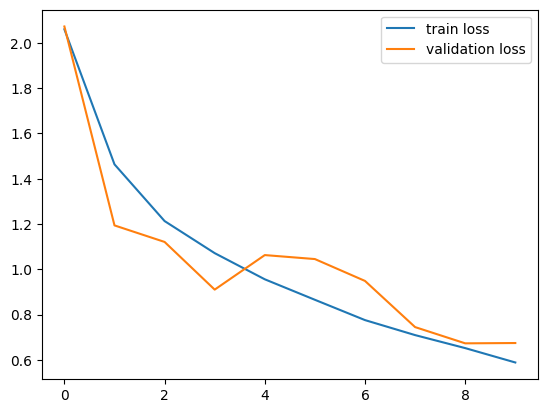

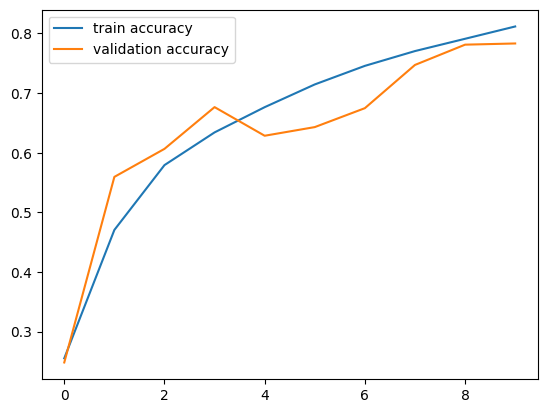

In [54]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()